# Background
수익을 본 경우 1분봉상 최대거래대금이 얼마였는지 궁금하다.  
유튜브: https://youtu.be/bDxXnIXV0wI

# Import

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [6]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,1
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,1
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,1
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,1
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,1


# Preprocessing

In [7]:
df['체결시간'] = pd.to_datetime(df['체결시간']).apply(lambda x : x.replace(second=00))

In [8]:
max_money = []
min_money = []

for i in range(len(df)):
    date = df.iloc[i]['주문일자']
    firm = df.iloc[i]['종목명']
    time = df.iloc[i]['체결시간']
    buy = df.iloc[i]['매수가']
    
    try:
        frame = pd.read_csv('minute/'+date+'_'+firm+'.csv')
        frame['시간'] = pd.to_datetime(frame['시간']).apply(lambda x : x.replace(second=00))
        frame = frame[frame['시간'] < time]
        
        max_volume = frame['거래량'].max()
        min_volume = frame['거래량'].min()
        
        max_price = frame[frame['거래량'] == max_volume].reset_index(drop=True).iloc[0]['종가']
        min_price = frame[frame['거래량'] == min_volume].reset_index(drop=True).iloc[0]['종가']
        
        max_vp = max_volume * max_price
        min_vp = min_volume * min_price
        
    except:
        max_vp = 0
        min_vp = 0
    
    max_money.append(max_vp)
    min_money.append(min_vp)


In [9]:
df['최대거래대금(억)'] = max_money
df['최소거래대금(억)'] = min_money

In [10]:
df['최대거래대금(억)'] = df['최대거래대금(억)'].apply(lambda x : round(x / 100000000))
df['최소거래대금(억)'] = df['최소거래대금(억)'].apply(lambda x : round(x / 100000000))

In [13]:
df = df[df['뉴스기사'] == 1]
df = df[df['최대거래대금(억)'] != 0]
df

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,최대거래대금(억),최소거래대금(억)
93,2022-04-08,2022-04-15 09:30:00,NHN벅스,17350,-0.58,NaN,104200,14.90,20.86,3.31,1,40,1
94,2022-04-08,2022-04-15 09:56:00,NHN벅스,17450,-1.72,NaN,104200,15.56,20.86,3.31,1,49,1
95,2022-04-08,2022-04-15 09:47:00,코스모화학,16250,-1.85,NaN,5420,11.68,13.06,0.69,1,51,0
100,2022-04-08,2022-04-15 13:54:00,엠아이텍,10750,2.33,NaN,179290,26.77,29.72,2.24,1,155,0
105,2022-04-12,2022-04-15 09:45:00,티사이언티픽,4505,-2.11,NaN,57680,20.78,22.65,14.08,1,92,4
106,2022-04-12,2022-04-15 09:55:00,GS글로벌,4050,2.84,NaN,1250,13.92,24.89,5.34,1,182,3
107,2022-04-13,2022-04-15 10:01:00,LG헬로비전,6160,1.95,NaN,37560,19.15,29.98,5.61,1,73,1


# Visualization
거래대금과 수익률은 비례관계에 있다.

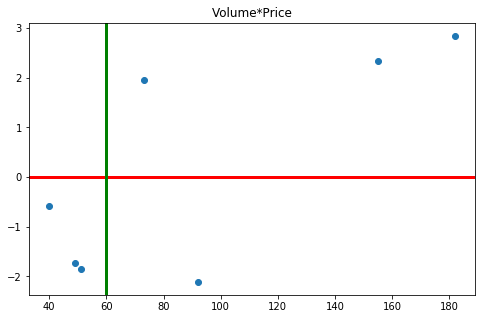

In [23]:
plt.figure(figsize=(8,5))
plt.title('Volume*Price')
plt.scatter(df['최대거래대금(억)'], df['수익률'])
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=60, color='g', linewidth=3)
plt.savefig('최대거래대금', dpi=300)
plt.show()

# Conclusion
매매하기 전 1분봉상 최대거래대금은 최소 60억원 이상 터져야 한다.